In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/naukri_com-job_sample.csv')

In [ ]:
df.head(3)

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,site_name,skills,min_pay,max_pay,min_exp,max_exp,avg_exp,avg_pay,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,NaN,ITES,150000.0,225000.0,0.0,1.0,0.5,187500.0,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,NaN,Marketing,150000.0,250000.0,0.0,0.0,0.0,200000.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Banglore,Pl/sql Developer - SQL,NaN,NaN,IT Software - Application Programming,NaN,NaN,4.0,8.0,6.0,NaN,13.0,10.0,2016.0


In [ ]:
data=df.copy()

In [ ]:
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_exp',
       'avg_pay', 'day', 'month', 'year'],
      dtype='object')

Text(0.5, 1.0, 'Stripped plot between min_pay and min_exp')

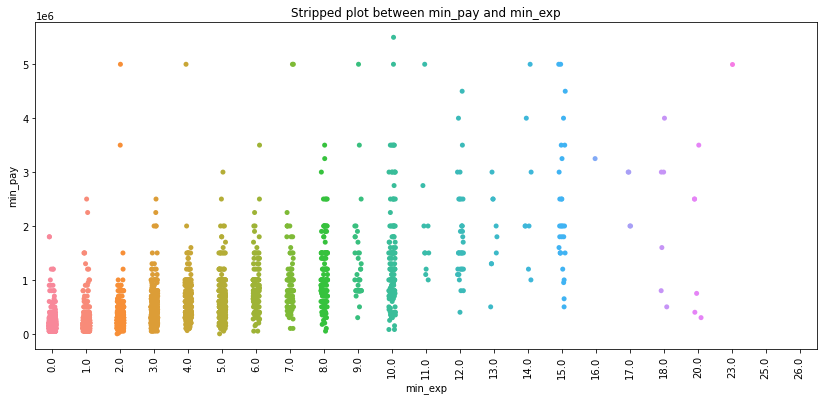

In [ ]:
#Bivariant analysis - on  two numerical values
# Perform analysis on both min-pay and min-exp
# When we have find relationship between both numerical values then we have to either plot
# 1. Scatter plot
# 2. Regression plot
# 3. Box plot
# 4. Strip plot

# Plot a strriped plot between  min_pay & min_exp
plt.figure(figsize=(14,6))
sns.stripplot(x='min_exp',y='min_pay',data=data)
plt.xticks(rotation='vertical')
plt.title('Stripped plot between min_pay and min_exp')

Text(0.5, 1.0, 'Stripped/Boxplot plot between min_pay and min_exp')

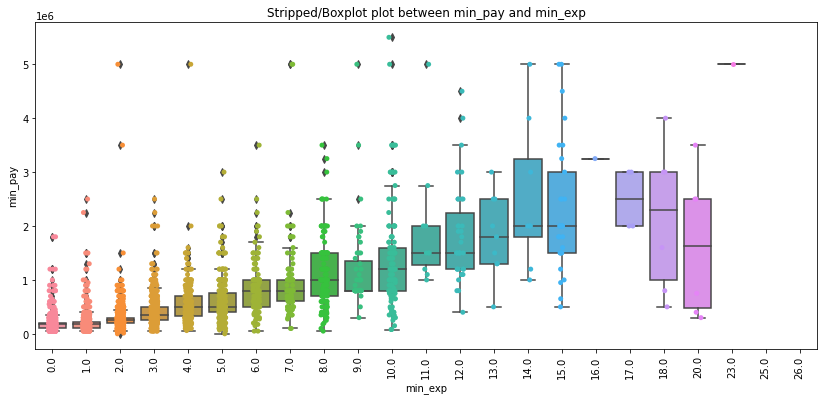

In [ ]:
# Plot a strriped & barplot plot between  min_pay & min_exp
plt.figure(figsize=(14,6))
sns.stripplot(x='min_exp',y='min_pay',data=data)
sns.boxplot(x='min_exp',y='min_pay',data=data)
plt.xticks(rotation='vertical')
plt.title('Stripped/Boxplot plot between min_pay and min_exp')

Text(0.5, 1.0, 'Stripped/Boxplot plot between max_pay and max_exp')

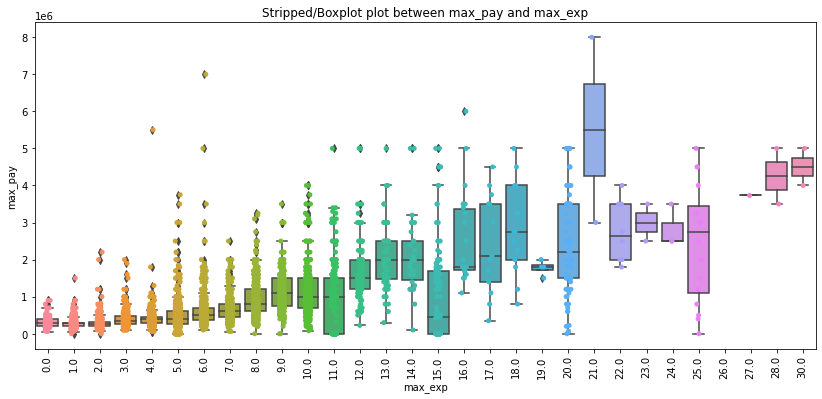

In [ ]:
# Plot a strriped & barplot plot between  max_pay & max_exp
plt.figure(figsize=(14,6))
sns.stripplot(x='max_exp',y='max_pay',data=data)
sns.boxplot(x='max_exp',y='max_pay',data=data)
plt.xticks(rotation='vertical')
plt.title('Stripped/Boxplot plot between max_pay and max_exp')

In [ ]:
# Find out the median of pay (Average of pay in industries)
# This is industry with least median pay
data[['max_pay','industry']].groupby(['industry']).median().sort_values(by='max_pay')

,max_pay
industry,
Iron and Steel,450.0
Education / Teaching / Training,39100.0
Heat Ventilation / Air Conditioning,275000.0
Wellness / Fitness / Sports / Beauty,275000.0
Animation / Gaming,287500.0
...,...
Glass / Glassware,1025000.0
Strategy / Management Consulting Firms,1200000.0
Pulp and Paper,1312500.0


In [ ]:
# This is industry with Top 10 median pay
data[['max_pay','industry']].groupby(['industry']).median().sort_values(by='max_pay',ascending=False).head(10)

,max_pay
industry,
Pulp and Paper,1312500.0
Strategy / Management Consulting Firms,1200000.0
Glass / Glassware,1025000.0
Telecom/ISP,950000.0
Tyres,900000.0
Ceramics / Sanitary ware,900000.0
IT-Software / Software Services,800000.0
Aviation / Aerospace Firms,800000.0
Water Treatment / Waste Management,800000.0


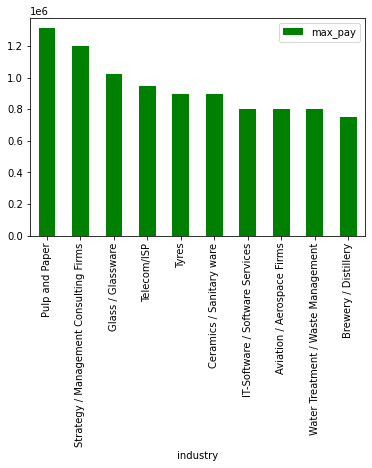

In [ ]:
# Bar graph representation industry with Top 10 max-median pay
data[['max_pay','industry']].groupby(['industry']).median().sort_values(by='max_pay',ascending=False).head(10).plot(kind='bar',color='green')

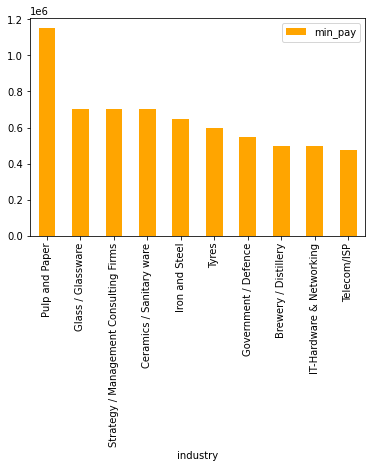

In [ ]:
# This is industry with Top 10 min-median pay
data[['min_pay','industry']].groupby(['industry']).median().sort_values(by='min_pay',ascending=False).head(10).plot(kind='bar',color='orange')

In [ ]:
# Top rated skills with respect to max-median pay
data[['max_pay','skills']].groupby(['skills']).median().sort_values(by='max_pay',ascending=False).head(10)

,max_pay
skills,
Top Management,3250000.0
IT Software - Middleware,1950000.0
Packaging,1625000.0
Shipping,1500000.0
Strategy,1400000.0
IT Software - Mobile,1300000.0
Analytics & Business Intelligence,1200000.0
IT Software - ERP,1200000.0
IT Software - DBA,975000.0


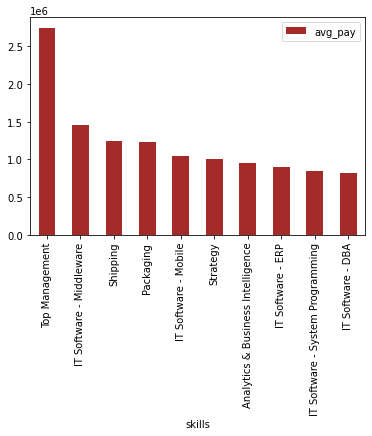

In [ ]:
# Top 10 skills with respect to  avg-median pay
data[['avg_pay','skills']].groupby(['skills']).median().sort_values(by='avg_pay',ascending=False).head(10).plot(kind='bar',color='brown')

In [ ]:
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_exp',
       'avg_pay', 'day', 'month', 'year'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot plot between average_pay and skills')

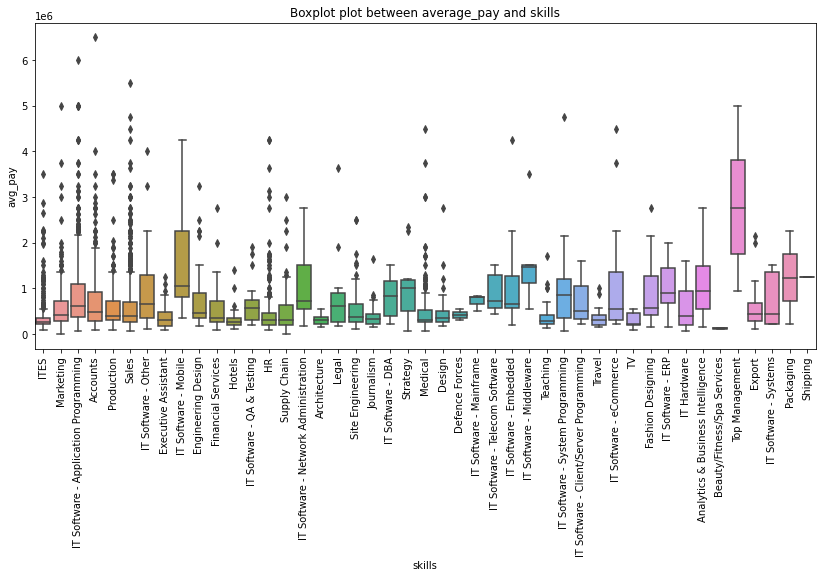

In [ ]:
# Plot a  barplot plot between  skills & avg_pay
plt.figure(figsize=(14,6))
sns.boxplot(x='skills',y='avg_pay',data=data)
plt.xticks(rotation='vertical')
plt.title('Boxplot plot between average_pay and skills')

In [ ]:
comp=data['skills'].value_counts().reset_index()
comp.head(10)

,index,skills
0,IT Software - Application Programming,5989
1,Sales,2893
2,ITES,1640
3,Teaching,1091
4,HR,928
5,Marketing,868
6,Accounts,860
7,Production,667
8,Medical,418
9,Financial Services,413


In [ ]:
comp.columns=['Skills','Average_pay']

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

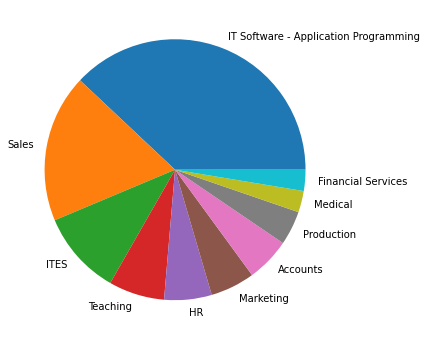

In [ ]:
#Now we will create a piechart
# Top 10 skills with respect to avg pay
plt.figure(figsize=(12,6))
plt.pie(labels=comp['Skills'][0:10],x=comp['Average_pay'][0:10])
plt.xticks(rotation='vertical')

In [ ]:
# Now we will do analysis on the available job positions 
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_exp',
       'avg_pay', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
 data['numberofpositions'].nunique()

84

In [ ]:
# Groupby Industry
data.groupby('industry')['numberofpositions'].sum()

industry
Accounting / Finance                                     365.0
Advertising / PR / MR / Event Management                5395.0
Agriculture / Dairy                                       26.0
Animation / Gaming                                         6.0
Architecture / Interior Design                            78.0
                                                        ...   
Travel / Hotels / Restaurants / Airlines / Railways    10421.0
Tyres                                                      3.0
Water Treatment / Waste Management                        14.0
Wellness / Fitness / Sports                               28.0
Wellness / Fitness / Sports / Beauty                      19.0
Name: numberofpositions, Length: 63, dtype: float64

In [ ]:
type(data.groupby('industry')['numberofpositions'].sum())

pandas.core.series.Series

In [ ]:
#Top 10 industries with highest no of jobs
data.groupby('industry')['numberofpositions'].sum().sort_values(ascending=False).head(10)

industry
BPO / Call Centre / ITES                               90777.0
Medical / Healthcare / Hospitals                       40755.0
IT-Software / Software Services                        21180.0
Travel / Hotels / Restaurants / Airlines / Railways    10421.0
Pharma / Biotech / Clinical Research                   10253.0
Advertising / PR / MR / Event Management                5395.0
Fresher / Trainee / Entry Level                         3949.0
Automobile / Auto Anciliary / Auto Components           2498.0
Banking / Financial Services / Broking                  2281.0
Insurance                                               2087.0
Name: numberofpositions, dtype: float64

Text(0.5, 1.0, 'Top 10 industry with maximum no of job positions')

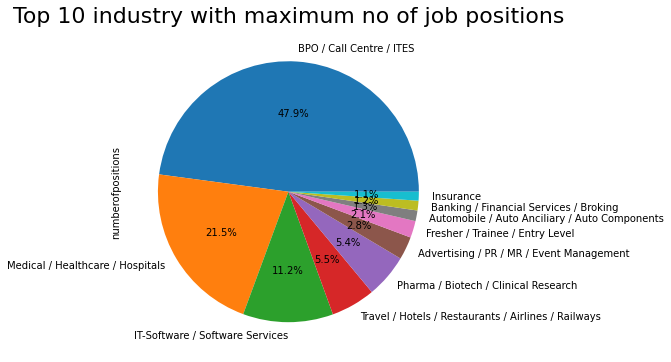

In [ ]:
plt.figure(figsize=(14,6))
data.groupby('industry')['numberofpositions'].sum().sort_values(ascending=False).head(10).plot(kind='pie',autopct='%1.1f%%')
plt.title('Top 10 industry with maximum no of job positions',fontsize=22)